In [19]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/AB_NYC_2019.csv")

# Quick look
print(df.head())
print(df.info())
print(df.describe())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [20]:
# Drop missing host names, optional
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Remove outliers
df = df[df['price'] < 1000]
df = df[df['minimum_nights'] < 365]


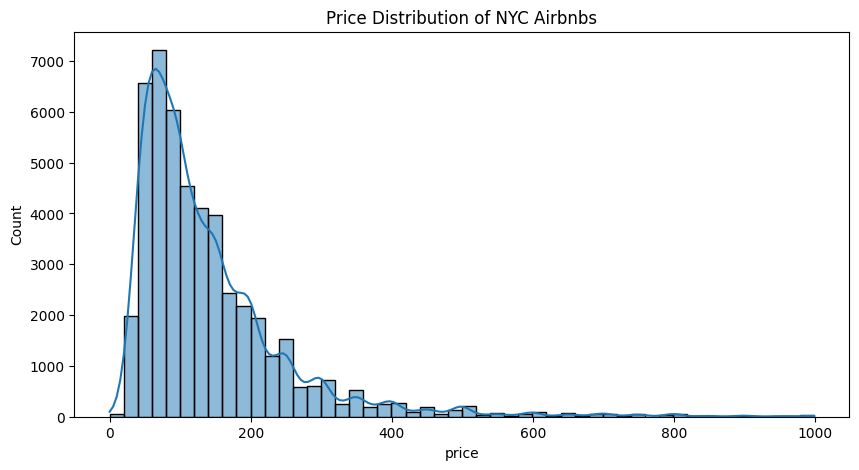

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution of NYC Airbnbs")
plt.show()


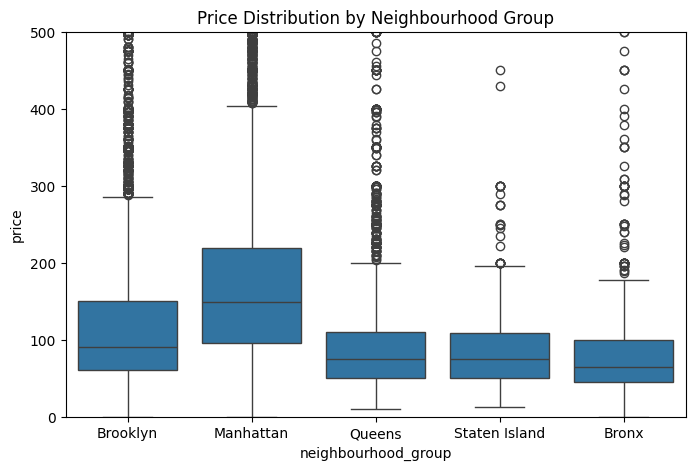

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="neighbourhood_group", y="price", data=df)
plt.ylim(0, 500)  # Focus on reasonable prices
plt.title("Price Distribution by Neighbourhood Group")
plt.show()


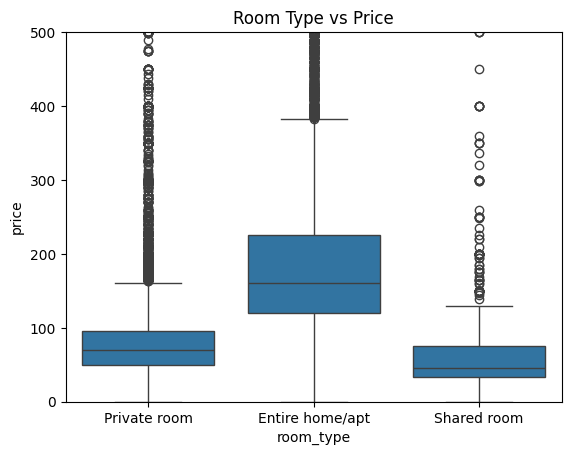

In [23]:
sns.boxplot(x="room_type", y="price", data=df)
plt.ylim(0, 500)
plt.title("Room Type vs Price")
plt.show()


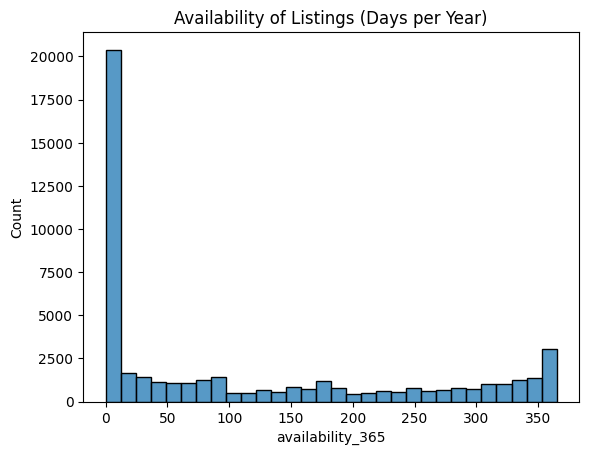

In [24]:
sns.histplot(df['availability_365'], bins=30)
plt.title("Availability of Listings (Days per Year)")
plt.show()


In [25]:
import folium

# Create a map centered on NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Sample points for performance
for lat, lon, price in zip(df['latitude'][:500], df['longitude'][:500], df['price'][:500]):
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color="blue",
        fill=True,
        popup=f"Price: ${price}"
    ).add_to(nyc_map)

nyc_map.save("nyc_airbnb_map.html")


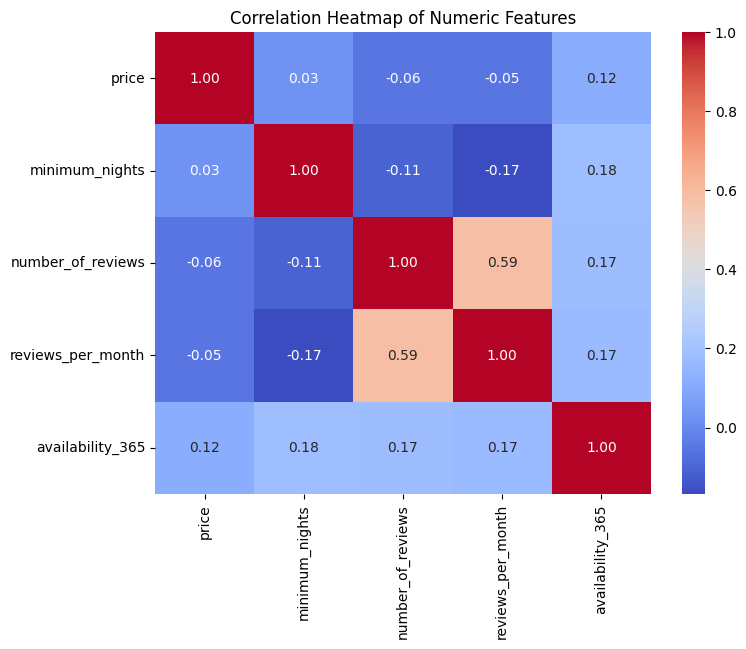

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_df = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']]

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


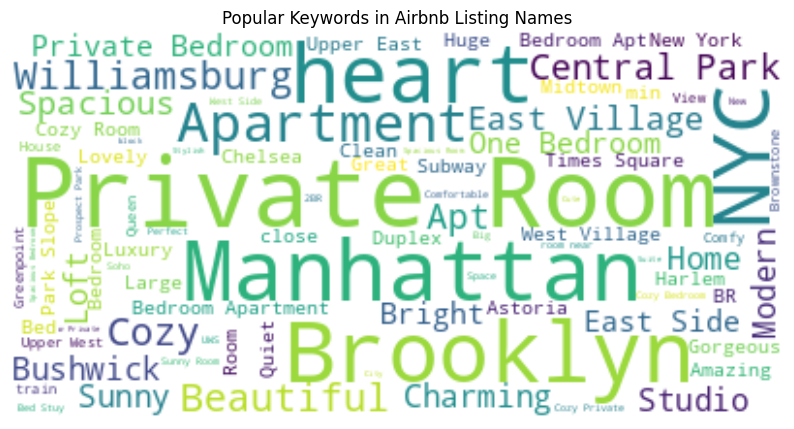

In [27]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(str(name) for name in df['name'] if isinstance(name, str))

# Generate WordCloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=100, colormap="viridis").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Popular Keywords in Airbnb Listing Names")
plt.show()


In [28]:
import plotly.express as px

# Price distribution by neighbourhood
fig = px.box(df, x="neighbourhood_group", y="price",
             points="all",
             title="Interactive Price Distribution by Borough")
fig.show()

# Availability map
fig = px.scatter_mapbox(df.sample(1000), lat="latitude", lon="longitude",
                        color="price", size="availability_365",
                        hover_name="neighbourhood",
                        mapbox_style="carto-positron",
                        zoom=10, title="Airbnb Listings in NYC")
fig.show()


In [29]:
# save this as app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv("AB_NYC_2019.csv")
df = df[df['price'] < 1000]  # remove outliers

st.title("NYC Airbnb Data Analysis")

# Borough filter
borough = st.selectbox("Select Borough", df['neighbourhood_group'].unique())
filtered = df[df['neighbourhood_group'] == borough]

# Plot
fig = px.histogram(filtered, x="price", nbins=50, title=f"Price Distribution in {borough}")
st.plotly_chart(fig)

# Map
fig2 = px.scatter_mapbox(filtered.sample(500), lat="latitude", lon="longitude",
                         color="price", mapbox_style="carto-positron", zoom=10)
st.plotly_chart(fig2)


ModuleNotFoundError: No module named 'streamlit'

In [31]:
!streamlit run /content/app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: /content/app.py
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) Ok

⠙npm error canceled
⠙npm error A complete log of this run can be found in: /root/.npm/_logs/2025-10-05T18_59_37_287Z-debug-0.log
⠙

In [32]:
# Create the app.py file
streamlit_code = """
import streamlit as st
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv("AB_NYC_2019.csv")
df = df[df['price'] < 1000]  # remove outliers

st.title("NYC Airbnb Data Analysis")

# Borough filter
borough = st.selectbox("Select Borough", df['neighbourhood_group'].unique())
filtered = df[df['neighbourhood_group'] == borough]

# Plot
fig = px.histogram(filtered, x="price", nbins=50, title=f"Price Distribution in {borough}")
st.plotly_chart(fig)

# Map
fig2 = px.scatter_mapbox(filtered.sample(500), lat="latitude", lon="longitude",
                         color="price", mapbox_style="carto-positron", zoom=10)
st.plotly_chart(fig2)
"""

with open("app.py", "w") as f:
    f.write(streamlit_code)

print("app.py created successfully!")

app.py created successfully!


In [30]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.7 MB/s eta 0:00:00
